# **IRIS CLASSIFICATION WITH LOGISTIC REGRESSION AND SVM**

In [ ]:
# Load CSV file from my google drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# import pandas library
# read csv file

import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/ML LEC PROJECT/Iris.csv"

iris_df = pd.read_csv(path)

# **1. Preprocessing**

In [2]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Deleting repetitive column.

In [3]:
iris_df = iris_df.drop(["Id"], axis=1)

Deleting NULL values

In [4]:
iris_df = iris_df.dropna()

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# import all necesarry librarries for plotting histogram and pdf
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import *
from scipy.stats import norm

##Plotting Histogram to represent distribution of features.

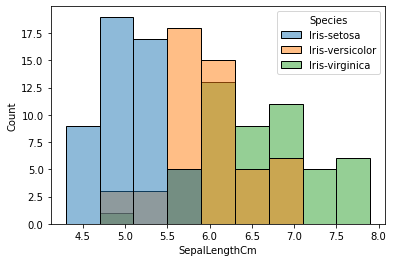

In [8]:
sb.histplot(data=iris_df, x="SepalLengthCm", hue="Species")

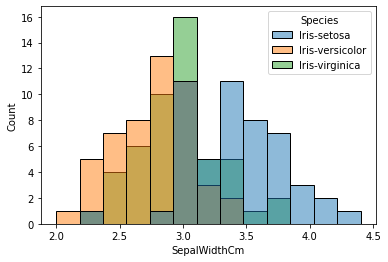

In [9]:
sb.histplot(data=iris_df, x="SepalWidthCm", hue="Species")

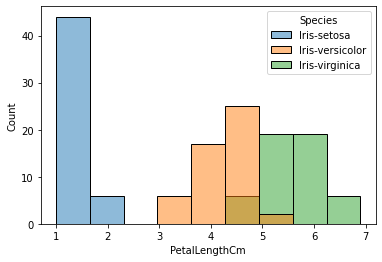

In [10]:
sb.histplot(data=iris_df, x="PetalLengthCm", hue="Species")

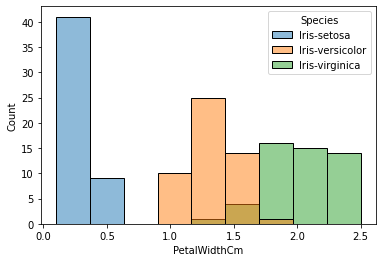

In [11]:
sb.histplot(data=iris_df, x="PetalWidthCm", hue="Species")

# **2. Feature Engineering**

# *Standardization*

In [12]:
new_iris_df = iris_df.copy()

new_iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
new_iris_df['SepalLengthCm'] = (iris_df['SepalLengthCm'] - iris_df['SepalLengthCm'].mean()) / iris_df['SepalLengthCm'].std()
new_iris_df['SepalWidthCm'] = (iris_df['SepalWidthCm'] - iris_df['SepalWidthCm'].mean()) / iris_df['SepalWidthCm'].std()
new_iris_df['PetalLengthCm'] = (iris_df['PetalLengthCm'] - iris_df['PetalLengthCm'].mean()) / iris_df['PetalLengthCm'].std()
new_iris_df['PetalWidthCm'] = (iris_df['PetalWidthCm'] - iris_df['PetalWidthCm'].mean()) / iris_df['PetalWidthCm'].std()

In [14]:
new_iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,Iris-virginica
146,0.551486,-1.277692,0.703536,0.918985,Iris-virginica
147,0.793012,-0.124540,0.816888,1.050019,Iris-virginica
148,0.430722,0.797981,0.930239,1.443121,Iris-virginica


# **3. Training**

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [16]:
new_iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,Iris-virginica
146,0.551486,-1.277692,0.703536,0.918985,Iris-virginica
147,0.793012,-0.124540,0.816888,1.050019,Iris-virginica
148,0.430722,0.797981,0.930239,1.443121,Iris-virginica


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [26]:
train, test = train_test_split(new_iris_df, test_size = 0.3)

In [18]:
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
62,0.189196,-1.969583,0.136778,-0.260321,Iris-versicolor
146,0.551486,-1.277692,0.703536,0.918985,Iris-virginica
111,0.672249,-0.816431,0.873564,0.918985,Iris-virginica
136,0.551486,0.797981,1.043591,1.574155,Iris-virginica
45,-1.259964,-0.124540,-1.336794,-1.177559,Iris-setosa
...,...,...,...,...,...
147,0.793012,-0.124540,0.816888,1.050019,Iris-virginica
30,-1.259964,0.106090,-1.223442,-1.308593,Iris-setosa
139,1.276066,0.106090,0.930239,1.181053,Iris-virginica
116,0.793012,-0.124540,0.986915,0.787951,Iris-virginica


In [19]:
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
61,0.068433,-0.124540,0.250129,0.394849,Iris-versicolor
97,0.430722,-0.355171,0.306805,0.132781,Iris-versicolor
34,-1.139200,0.106090,-1.280118,-1.439627,Iris-setosa
29,-1.380727,0.336720,-1.223442,-1.308593,Iris-setosa
17,-0.897674,1.028611,-1.336794,-1.177559,Iris-setosa
55,-0.173094,-0.585801,0.420157,0.132781,Iris-versicolor
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
110,0.793012,0.336720,0.760212,1.050019,Iris-virginica
102,1.517592,-0.124540,1.213619,1.181053,Iris-virginica
72,0.551486,-1.277692,0.646860,0.394849,Iris-versicolor


In [ ]:
LGR = LogisticRegression(C = 1.0, solver = 'liblinear').fit(
    train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]], train["Species"])

In [20]:
from sklearn import svm

In [21]:
SVM = svm.SVC().fit(train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]], train["Species"])

## **4. Evaluation**

**Logistic Regression**

In [ ]:
iris_classification_test = LGR.predict(test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

iris_classification_train = LGR.predict(train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

accuracy_testdata = accuracy_score(test["Species"], iris_classification_test)

accuracy_traindata = accuracy_score(train["Species"], iris_classification_train)

print(" Accuracy Test Data : %.2f" % accuracy_testdata)

print(" Accuracy Train Data : %.2f" % accuracy_traindata)

 Accuracy Test Data : 0.93
 Accuracy Train Data : 0.92


In [ ]:
LGR.intercept_

array([-1.52947547, -0.7458274 , -2.39667684])

In [ ]:
LGR.coef_

array([[-0.83032044,  1.17730481, -1.59002331, -1.39134274],
       [ 0.281596  , -1.21701288,  0.90429556, -1.0254083 ],
       [ 0.14758792,  0.04089635,  1.59041609,  2.40017344]])

In [ ]:
LGR.predict_proba(test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

In [ ]:
LGR.predict_proba(train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

# *Confusion Matrix*

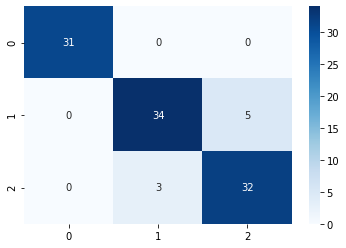

In [ ]:
cf_matrix = confusion_matrix(train["Species"], iris_classification_train)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

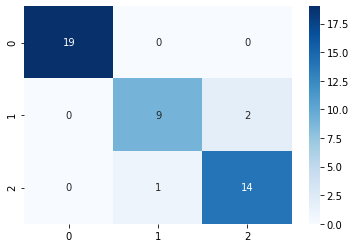

In [ ]:
cf_matrix = confusion_matrix(test["Species"], iris_classification_test)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# *Classification Report*

In [ ]:
print(classification_report(train["Species"], iris_classification_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       0.92      0.87      0.89        39
 Iris-virginica       0.86      0.91      0.89        35

       accuracy                           0.92       105
      macro avg       0.93      0.93      0.93       105
   weighted avg       0.92      0.92      0.92       105



In [ ]:
print(classification_report(test["Species"], iris_classification_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.90      0.82      0.86        11
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.93      0.93      0.93        45



# SVM

In [27]:
svm_classification_test = SVM.predict(test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

svm_classification_train = SVM.predict(train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])

accuracy_testdata = accuracy_score(test["Species"], svm_classification_test)

accuracy_traindata = accuracy_score(train["Species"], svm_classification_train)

print(" Accuracy Test Data : %.2f" % accuracy_testdata)

print(" Accuracy Train Data : %.2f" % accuracy_traindata)

 Accuracy Test Data : 1.00
 Accuracy Train Data : 0.96


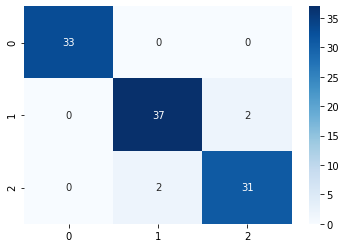

In [28]:
cf_matrix_svm = confusion_matrix(train["Species"], svm_classification_train)
sb.heatmap(cf_matrix_svm, cmap="Blues", annot=True)
plt.show()

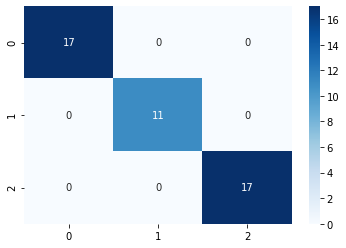

In [29]:
cf_matrix_svm2 = confusion_matrix(test["Species"], svm_classification_test)
sb.heatmap(cf_matrix_svm2, cmap="Blues", annot=True)
plt.show()

In [30]:
print(classification_report(train["Species"], svm_classification_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        33
Iris-versicolor       0.95      0.95      0.95        39
 Iris-virginica       0.94      0.94      0.94        33

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105



In [31]:
print(classification_report(test["Species"], svm_classification_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

